## Algorithms for phase retrieval
Implementation for 
* Smoothing on top of regular phase diversity (ER)

As suggested by Rodriguez+[2013](https://doi.org/10.1107/S0021889813002471),
and the overall usefulness of phase diversity (even with our ER [implementation](https://nbviewer.jupyter.org/github/Mipanox/GPI_stuff/blob/master/notebooks/PR_PD-ER.ipynb)),
we combine the two algorithms in the following sense:

<p style="text-indent: 40px">The first three steps of phase retrieval are the same (estimate-> Fourier constraints -> inverse transform). 
<br><p style="text-indent: 40px">In the fourth step where one applies object-domain constraints, we first employ ER:

$$
\rho_j^{\prime\prime}(\mathbf{x}) = 
\left\{
\begin{matrix}
    \rho_j^\prime(\mathbf{x}), & \text{if}\ \mathbf{x}\in S \cap  (\text{constraints})\\
    0, & \text{otherwise}
  \end{matrix}\right.
$$
<br><p style="text-indent: 40px">where $\rho_j^\prime(\mathbf{x})$ is the new estimate obtained in step 3.
<br><p style="text-indent: 40px">Then we do smoothing, assign it as the estimate for the next iteration:

$$
\rho_{j+1}{(\mathbf{x})} = 
\left\{
\begin{matrix}
    \rho^{\prime\prime}(\mathbf{x}), & \text{if}\ \mathbf{x}\in S \\
    \mathfrak{F}^{-1}[\mathfrak{F}[\rho_j^{\prime\prime}(\mathbf{x})]W(\mathbf{k})], & \text{otherwise}
  \end{matrix}\right.
$$
<br><p style="text-indent: 40px">where $W(\mathbf{k})$ is the smoothing function in the Fourier domain, which can be a 2-dimensional Gaussian with varying broadness as in the paper.

For other details, refer to the paper.

In [14]:
%%capture
%load_ext autoreload
%autoreload 2+

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
exec(open('../codes/zernike.py'))
exec(open('../codes/pr.py'))
exec(open('../codes/util.py'))
%matplotlib inline

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18

---
## Input (true images)
#### 10x defocusing
As usual, maximum 20% aberrations in ONLY phase. 

In [32]:
coeff2 = [0,1,0,0,0,1,1,0,2,0,0,0,0,0,0]
coeff1 = [0]*15 #np.random.random(15)
P,P_,F,F_ = true_imgs(Npix=128,coeff1=coeff1,coeff2=coeff2,oversamp=2)

In [33]:
defocus = 10
[P10,P_10,F10,F_10], \
[D10,D_10,Fd10,F_d10] = true_imgs_defocus(Npix=128,oversamp=2,
                                          coeff1=coeff1,
                                          coeff2=coeff2,
                                          defocus=defocus)

#### Oversampling
Zero-pad the pupil plane (object domain) image to for oversampling of 2 (Miao+[1998](http://dx.doi.org/10.1364/JOSAA.15.001662))

In [34]:
test10 = PR(pup=P10,foc=F10,oversamp=2)
test10(foc_defoc=[F10,Fd10])

#### Inputs

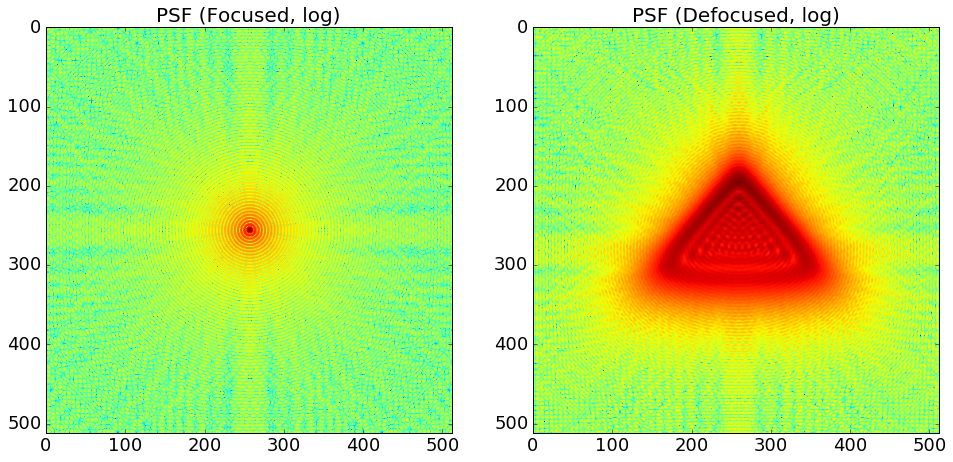

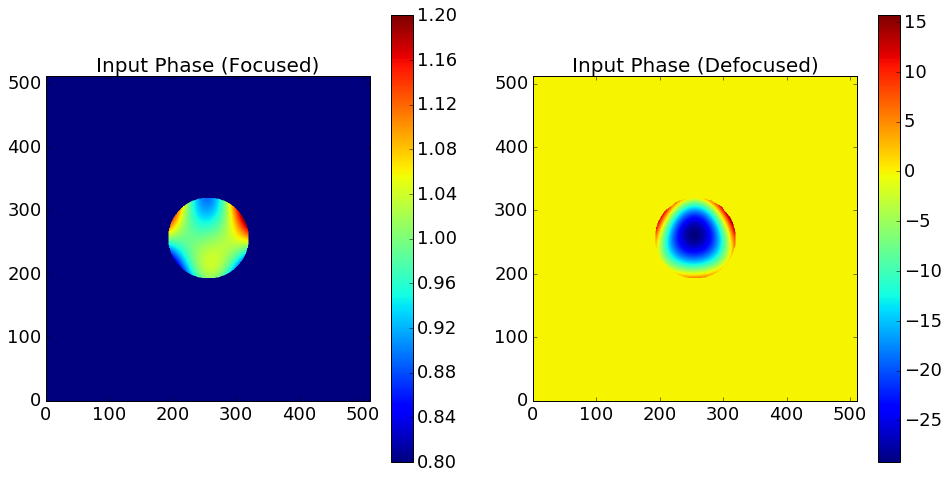

In [35]:
plt.figure(figsize=(16,8))
plt.subplot(121); plt.imshow(np.sqrt(test10.foc_foc),norm=LogNorm()); plt.title('PSF (Focused, log)')
plt.subplot(122); plt.imshow(np.sqrt(test10.foc_def),norm=LogNorm()); plt.title('PSF (Defocused, log)')

plt.figure(figsize=(16,8))
plt.subplot(121); plt.imshow(unwrap_phase(np.angle(P_10)),origin='lower'); 
plt.colorbar(); plt.title('Input Phase (Focused)'); plt.clim(0.8,1.2)
plt.subplot(122); plt.imshow(unwrap_phase(np.angle(D_10)),origin='lower'); 
plt.colorbar(); plt.title('Input Phase (Defocused)')

### Run
#### 1. Random initial guess with default $\alpha$ evolution

Caution: Pupil image is not used for constraints.


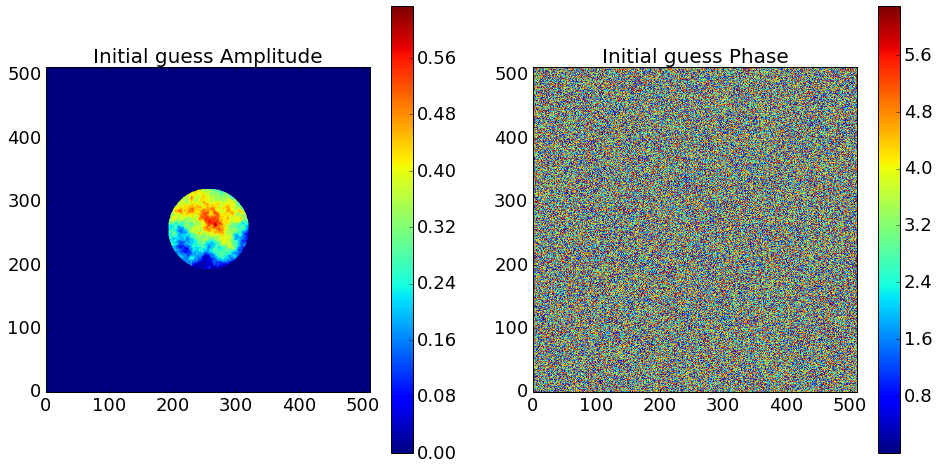

Current filter:


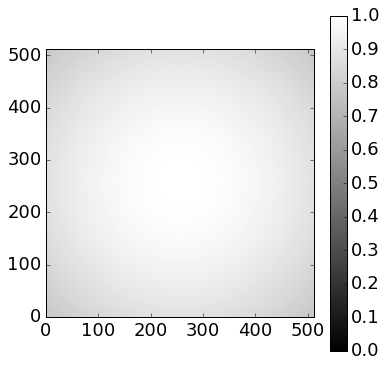

Current step                    : 0
Error (of focused Fourier plane): 9.75e-03
Current step                    : 100
Error (of focused Fourier plane): 2.88e-03
Current filter:


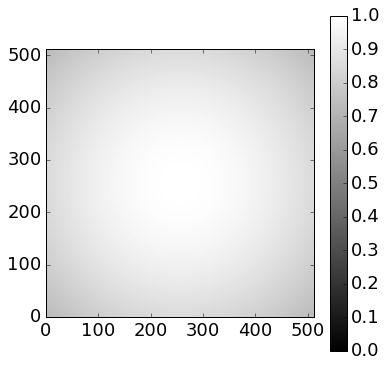

Current step                    : 200
Error (of focused Fourier plane): 2.87e-03
Current step                    : 300
Error (of focused Fourier plane): 2.89e-03
Current filter:


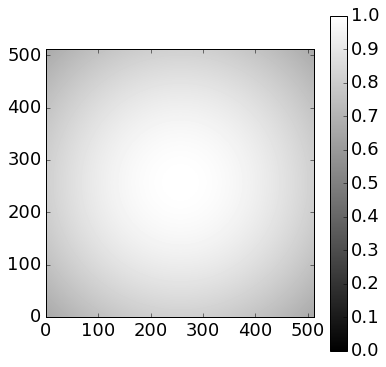

Current step                    : 400
Error (of focused Fourier plane): 2.91e-03
Current step                    : 500
Error (of focused Fourier plane): 2.93e-03
Current filter:


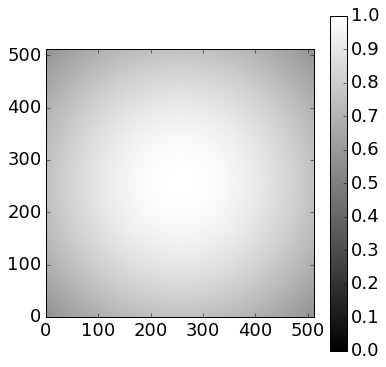

Current step                    : 600
Error (of focused Fourier plane): 2.97e-03
Current step                    : 700
Error (of focused Fourier plane): 2.98e-03
Current filter:


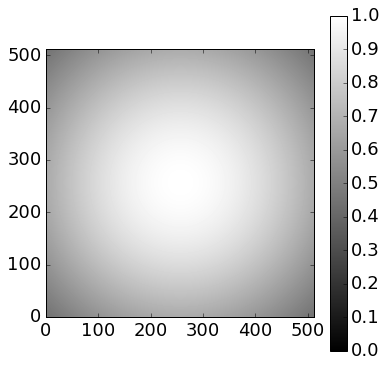

Current step                    : 800
Error (of focused Fourier plane): 2.99e-03
Current step                    : 900
Error (of focused Fourier plane): 3.02e-03
Current filter:


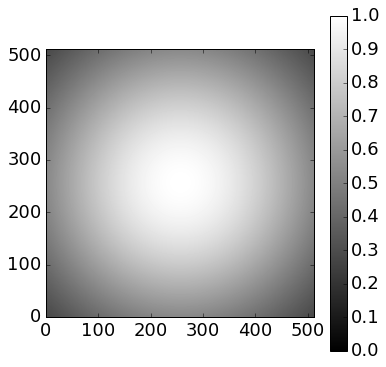

Current step                    : 1000
Error (of focused Fourier plane): 3.03e-03
Current step                    : 1100
Error (of focused Fourier plane): 3.04e-03
Current filter:


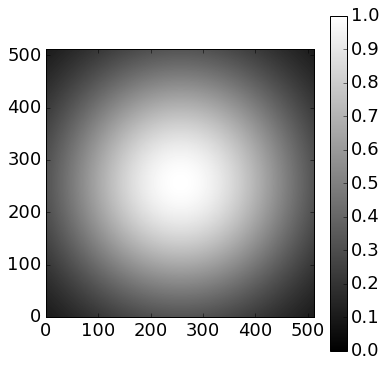

Current step                    : 1200
Error (of focused Fourier plane): 3.06e-03
Current step                    : 1300
Error (of focused Fourier plane): 3.05e-03
Current filter:


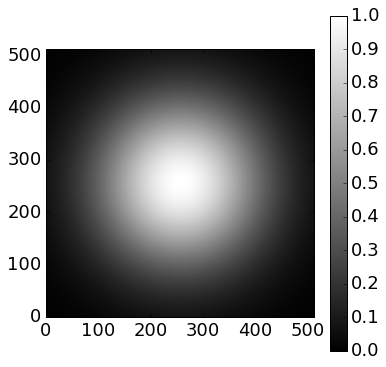

Current step                    : 1400
Error (of focused Fourier plane): 3.08e-03
Current step                    : 1500
Error (of focused Fourier plane): 3.05e-03
Current filter:


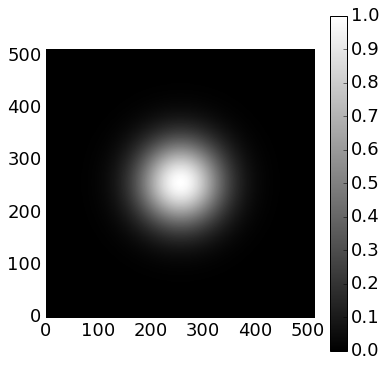

Current step                    : 1600
Error (of focused Fourier plane): 3.04e-03
Current step                    : 1700
Error (of focused Fourier plane): 2.99e-03
Current filter:


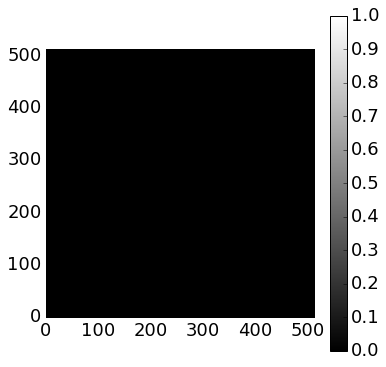

Current step                    : 1800
Error (of focused Fourier plane): 2.98e-03
Current step                    : 1900
Error (of focused Fourier plane): 3.09e-03
-----------------------
First iteration error: 9.75e-03
Final step : 2000
Final Error: 3.10e-03


In [36]:
PD_ER_pup10, \
PD_ER_foc10, \
PD_ER_errlist10, \
PD_ER_pup10_proj = test10.PD_ER_smoothing(defocus=defocus)

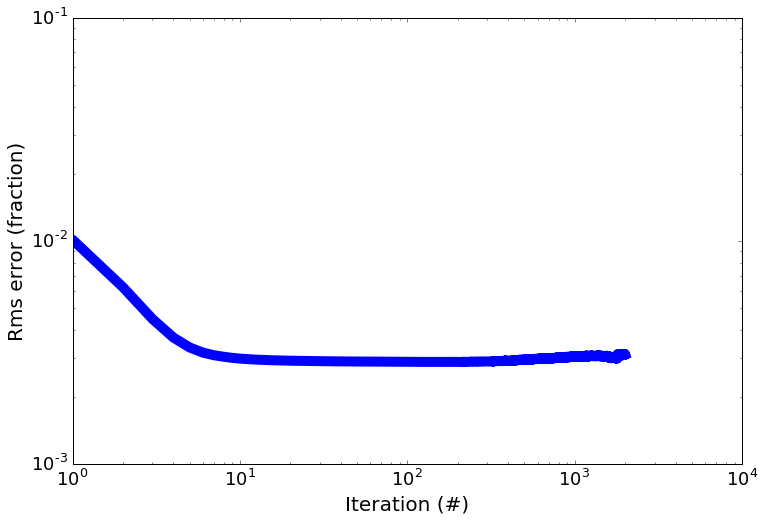

In [37]:
plot_errlist(PD_ER_errlist10)

Interesting. Why aren't we observing the same "cliff"?

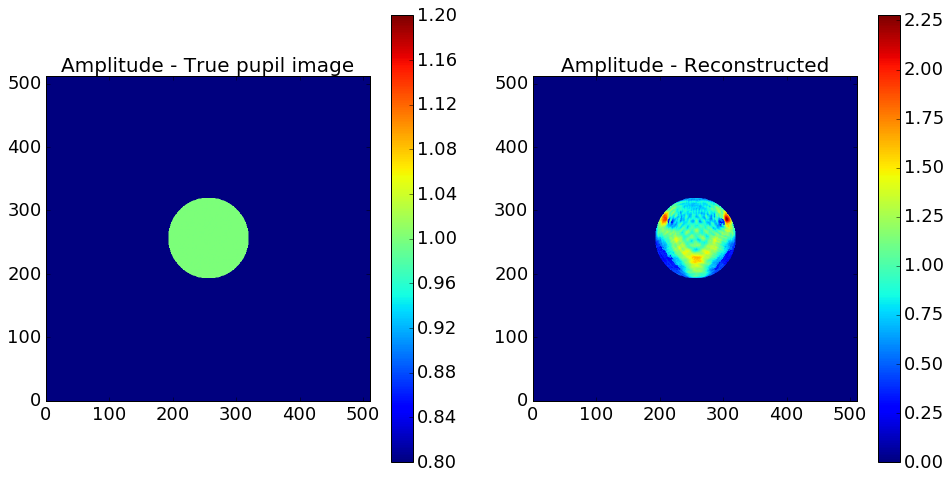

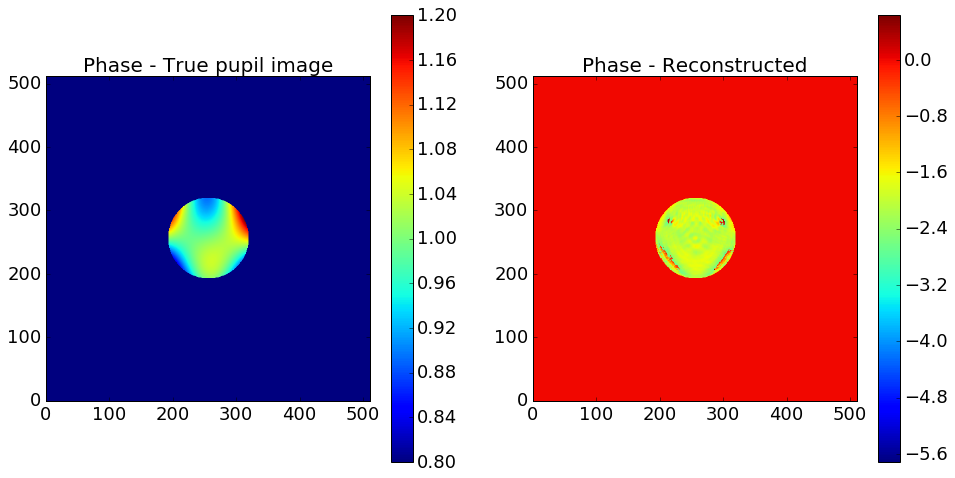

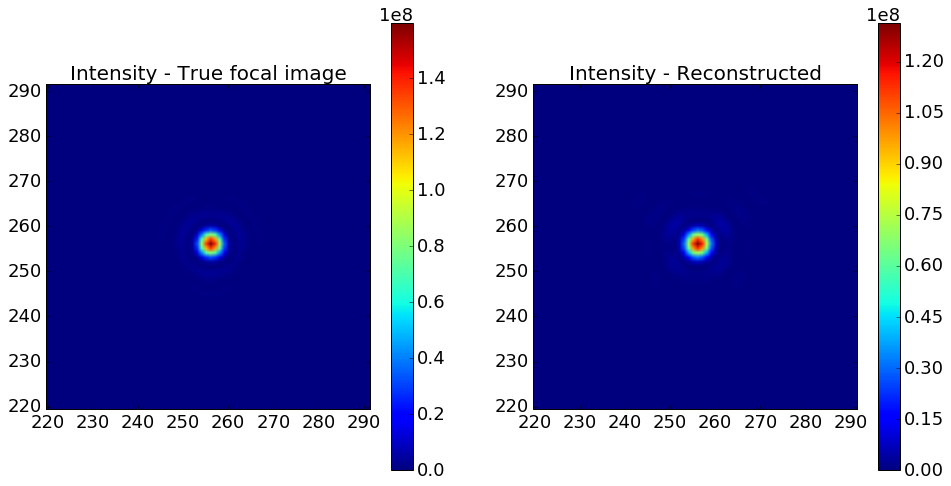

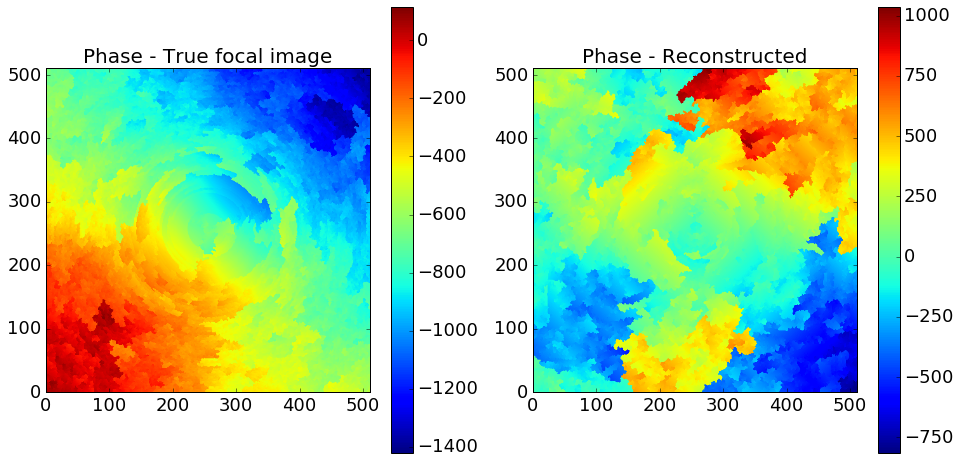

In [38]:
plot_recon(P_10,F_10,PD_ER_pup10_proj,PD_ER_foc10)

### 100% aberrations

In [4]:
coeff2 = np.random.random(15)
coeff1 = np.random.random(15)

defocus = 10
[P1,P_1,F1,F_1], \
[D1,D_1,Fd1,F_d1] = true_imgs_defocus(Npix=128,oversamp=2,
                                      coeff1=coeff1,
                                      coeff2=coeff2,
                                      defocus=defocus,
                                      max_aberA=1.,max_aberP=1.)

In [5]:
test1 = PR(pup=P1,foc=F1,oversamp=2)
test1(foc_defoc=[F1,Fd1])

#### random initial guesses and default $\alpha$ evolution

Caution: Pupil image is not used for constraints.


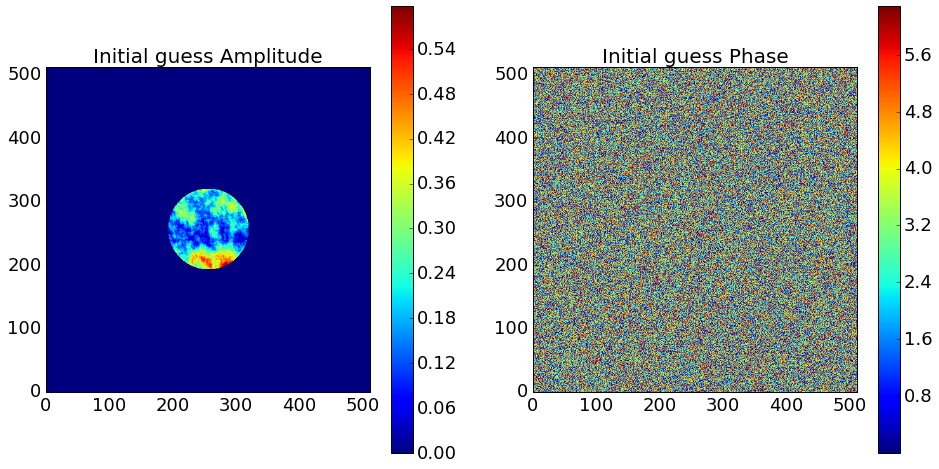

Current filter:


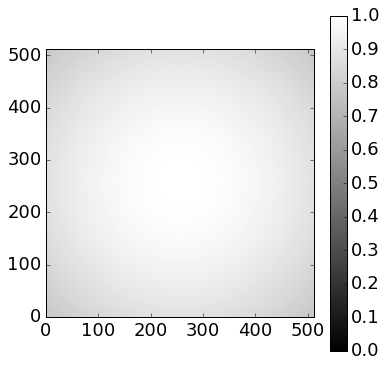

Current step                    : 0
Error (of focused Fourier plane): 9.75e-03
Current step                    : 100
Error (of focused Fourier plane): 2.43e-03
Current filter:


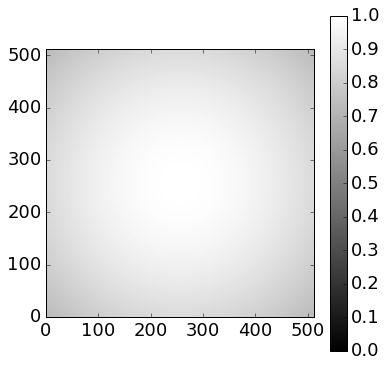

Current step                    : 200
Error (of focused Fourier plane): 2.44e-03
Current step                    : 300
Error (of focused Fourier plane): 2.43e-03
Current filter:


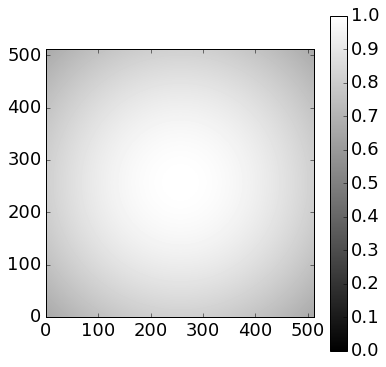

Current step                    : 400
Error (of focused Fourier plane): 2.43e-03
Current step                    : 500
Error (of focused Fourier plane): 2.43e-03
Current filter:


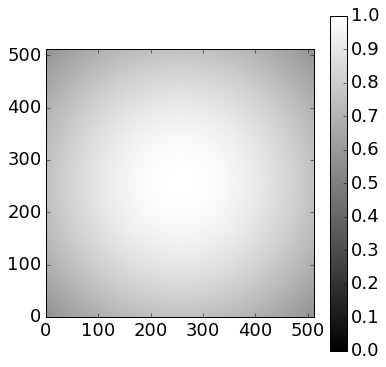

Current step                    : 600
Error (of focused Fourier plane): 2.43e-03
Current step                    : 700
Error (of focused Fourier plane): 2.43e-03
Current filter:


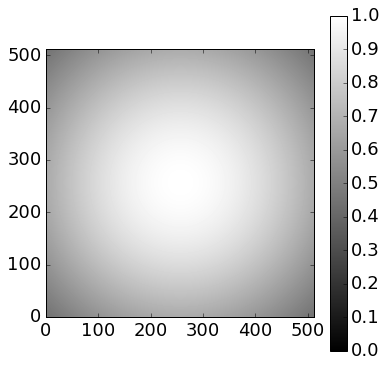

Current step                    : 800
Error (of focused Fourier plane): 2.44e-03
Current step                    : 900
Error (of focused Fourier plane): 2.43e-03
Current filter:


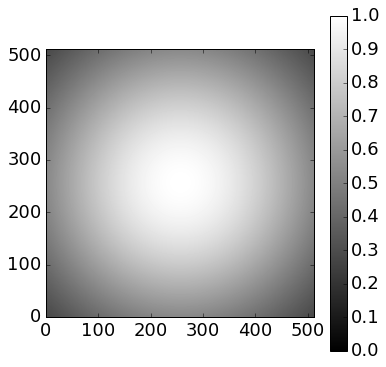

Current step                    : 1000
Error (of focused Fourier plane): 2.44e-03
Current step                    : 1100
Error (of focused Fourier plane): 2.42e-03
Current filter:


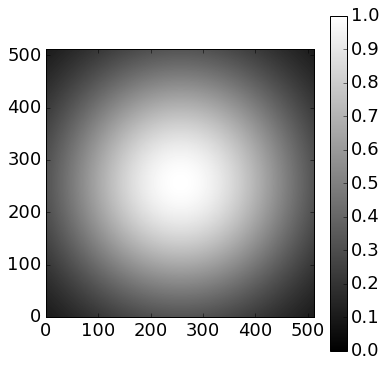

Current step                    : 1200
Error (of focused Fourier plane): 2.42e-03
Current step                    : 1300
Error (of focused Fourier plane): 2.41e-03
Current filter:


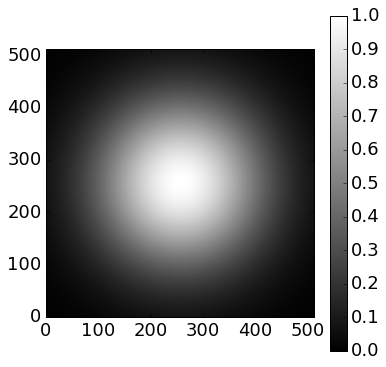

Current step                    : 1400
Error (of focused Fourier plane): 2.42e-03
Current step                    : 1500
Error (of focused Fourier plane): 2.40e-03
Current filter:


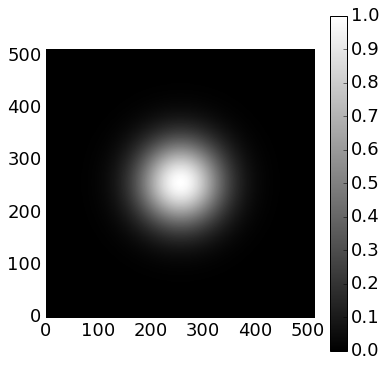

Current step                    : 1600
Error (of focused Fourier plane): 2.40e-03
Current step                    : 1700
Error (of focused Fourier plane): 2.38e-03
-----------------------
First iteration error: 9.75e-03
Final step : 1800
Final Error: 2.39e-03


In [6]:
PD_ER_pup1, \
PD_ER_foc1, \
PD_ER_errlist1, \
PD_ER_pup1_proj = test1.PD_ER_smoothing(defocus=defocus)

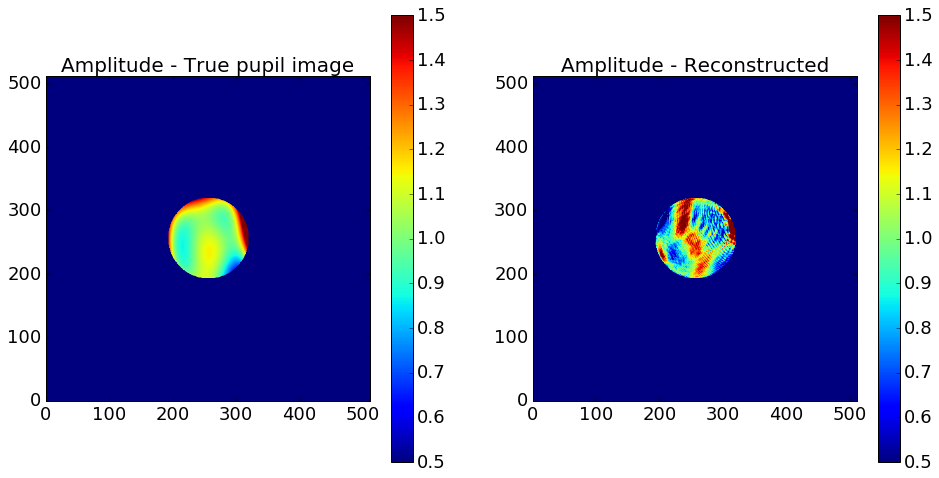

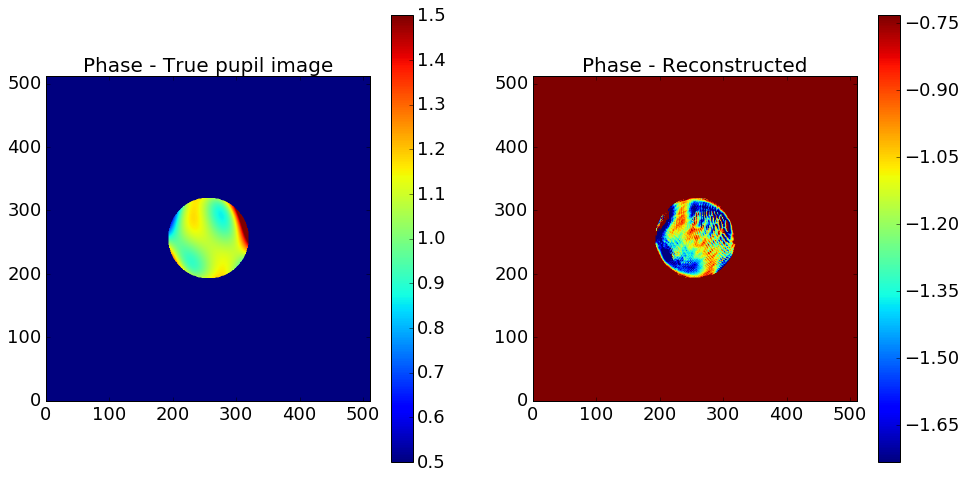

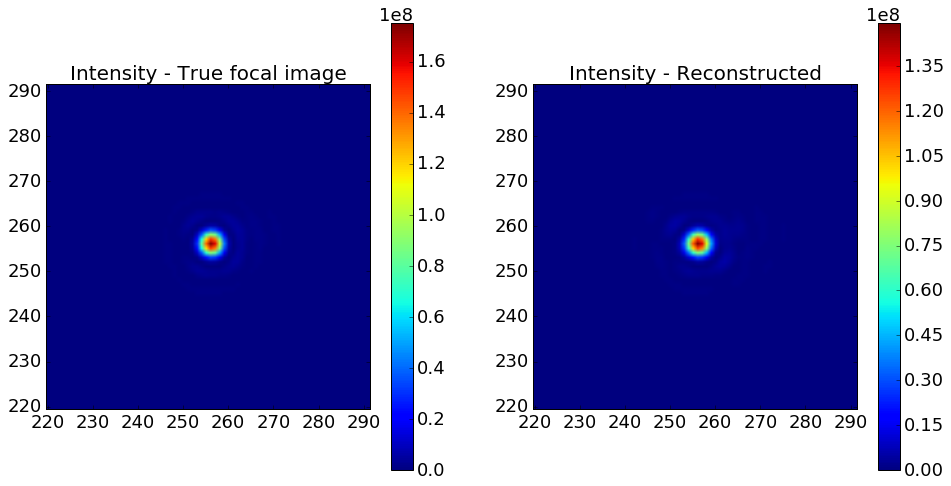

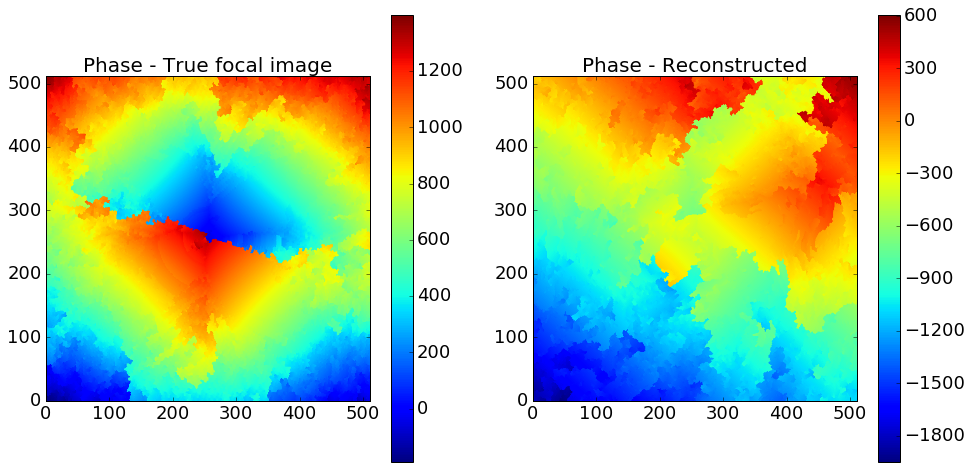

In [12]:
plot_recon(P_1,F_1,PD_ER_pup1_proj,PD_ER_foc1,recons_clim=True,
           max_abrAmp=0.5,max_abrPha=0.5)

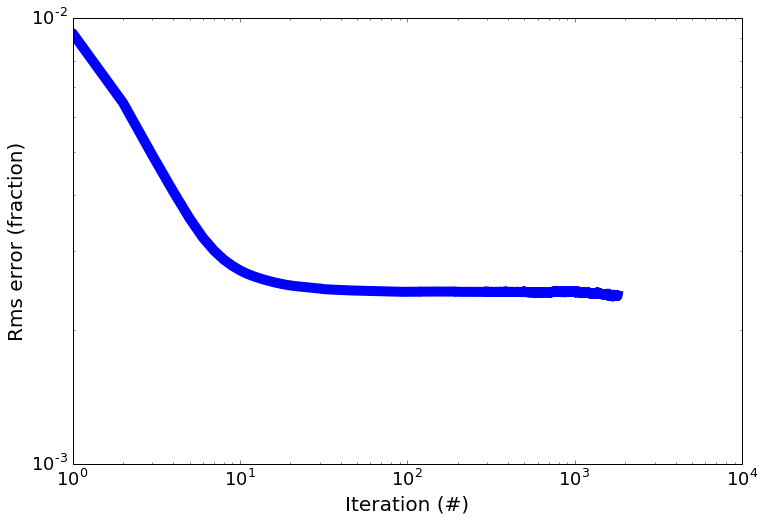

In [13]:
plot_errlist(PD_ER_errlist1)